<hr style="border:0.2px solid black"> </hr>

<figure>
  <IMG SRC="img/ntnu-norwegian-university-of-science-and-technology-vector-logo.png" WIDTH=250 ALIGN="right">
</figure>

**<ins>Course:</ins>** TVM4174 - Hydroinformatics for Smart Water Systems

# <ins>Example 4d:</ins> Simple Examples that EPANET can't do
    
*Developed by David B. Steffelbauer*

<hr style="border:0.2px solid black"> </hr>

## PageRank example for Hydroinformatics

This example shows how to apply Google's PageRank algorithm on a water related-problem. 

In [1]:
import wntr
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
# Create a water network model from an EPANET file
wn = wntr.network.WaterNetworkModel('data/L-Town.inp')

In [3]:
# Produce a Graph of the network (in the Graph theory meaning) weighted by demand
demand = wn.query_node_attribute('base_demand')
start = wn.query_link_attribute('start_node_name')
end = wn.query_link_attribute('end_node_name')

data = dict()
for l in start.index:
    try:
        data[l] = 0.5 * (demand[start[l]] + demand[end[l]])
    except:
        data[l] = 0.0

data = pd.Series(data)
data = data/data.sum()

G = nx.Graph(wn.get_graph(link_weight=data))

(<matplotlib.collections.PathCollection at 0x7fcc4b44b890>,
 <matplotlib.collections.LineCollection at 0x7fcc4b72f2d0>)

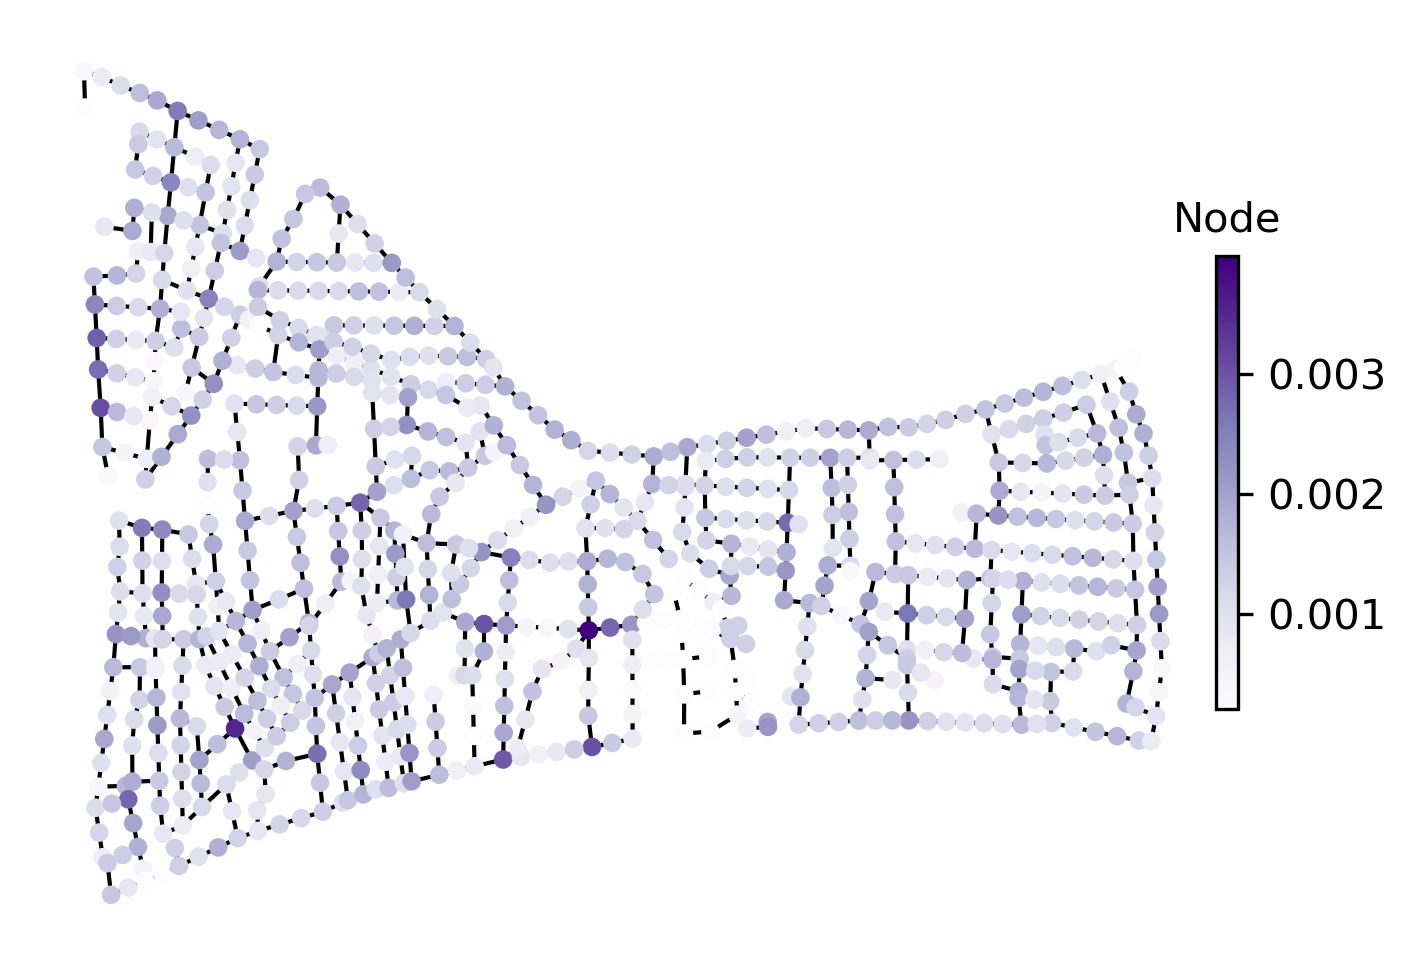

In [4]:
# Run PageRank algorithm and compute the ranks
rank = nx.pagerank(G)

# Plot the ranks
wntr.graphics.plot_network(wn, node_attribute=rank, node_cmap='Purples')

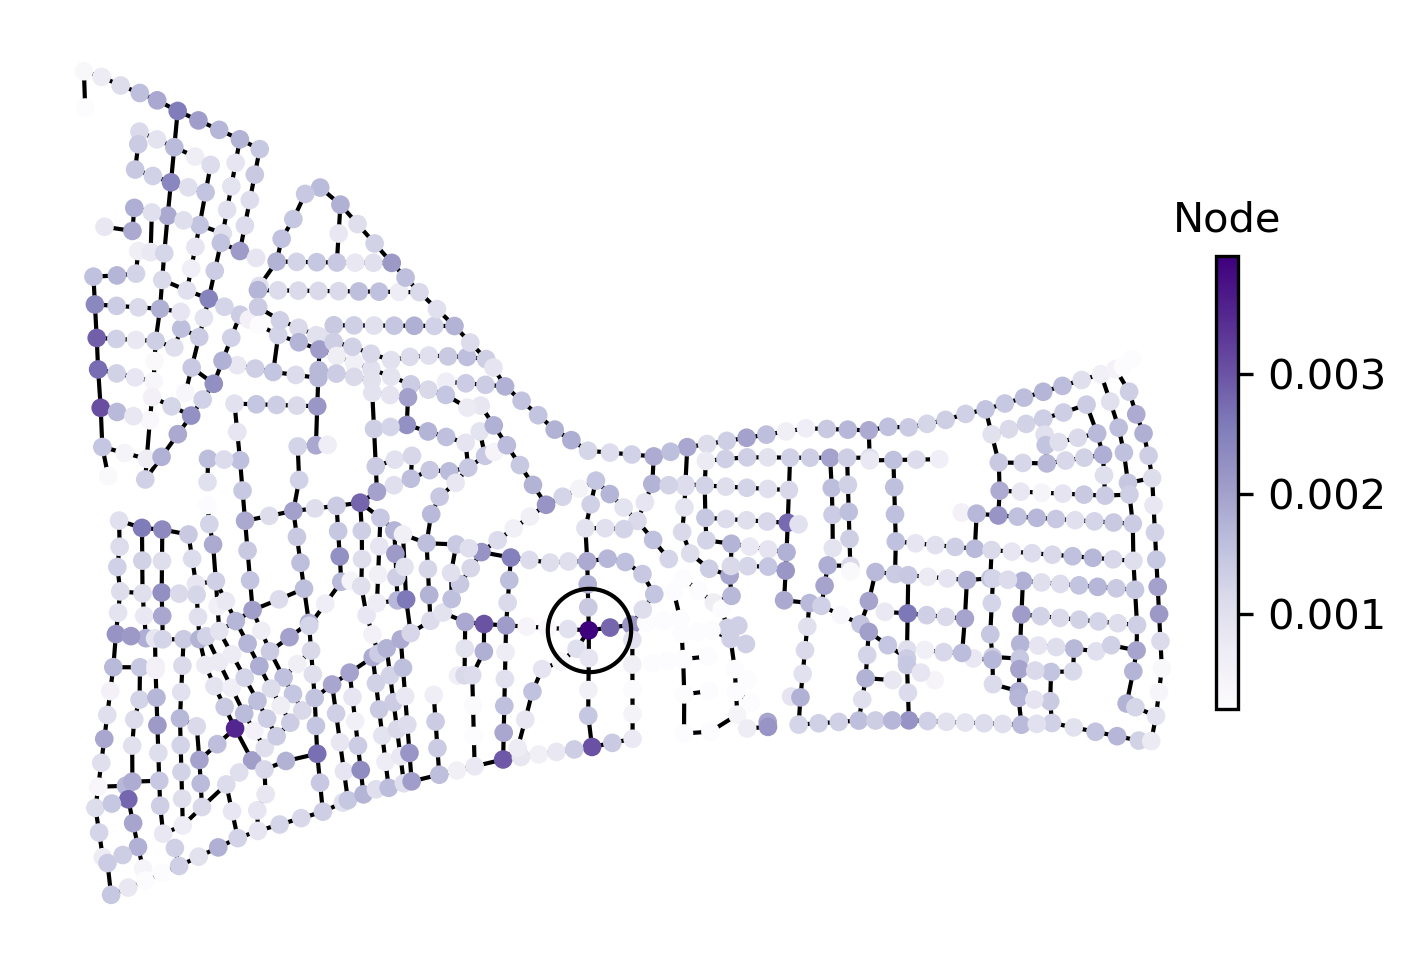

In [5]:
# Identify most important node
rank = pd.Series(rank)
top = rank.idxmax()

# Plot most important node
n = wn.get_node(top)
x, y = n.coordinates
wntr.graphics.plot_network(wn, node_attribute=rank, node_cmap='Purples')
plt.plot(x, y, 'ko', markersize=20, markerfacecolor='None')    